<a href="https://colab.research.google.com/github/ana-garcia1/10_CA_fisa/blob/main/Graficos_Mejorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAMBIAR:
- ARCHIVO DE ENTRADA
- NOMBRE DEL CÚMULO
- NOMBRE DEL TEMPLATE
- E(B-V) USADO
- ARCHIVO DE SALIDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [97]:
df = pd.read_csv("BH92_IaM01III_1.fisa", skiprows=11,header=None, delim_whitespace=True)

#Eqtiquetas
nombre_cum = 'vdBH 92'
nombre_temp = 'Ia 80% + M01III 20%'
enroj = 0.1

df.columns = ['wl','flux']
df=df[df['wl']>0]
df.head(2)

<ipython-input-97-8bc4d3b1facb>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("BH92_IaM01III_1.fisa", skiprows=11,header=None, delim_whitespace=True)


,wl,flux
0,3700.00000,0.845335
1,3703.42993,0.874374


In [98]:
# Calcular la diferencia entre cada valor y el siguiente
df['diff'] = df['wl'].diff().shift(-1)

# Encontrar los índices donde 'diff' es negativo
indices = df[df['diff'] < 0].index
df = df.drop('diff',axis=1)
indices

Index([905, 2456, 3362], dtype='int64')

In [99]:
Unreddened = df.loc[:indices[0]]
Template = df.loc[indices[0]+1:indices[1]]
Observed = df.loc[indices[1]+1:indices[2]]
Residual = df.loc[indices[2]+1:]

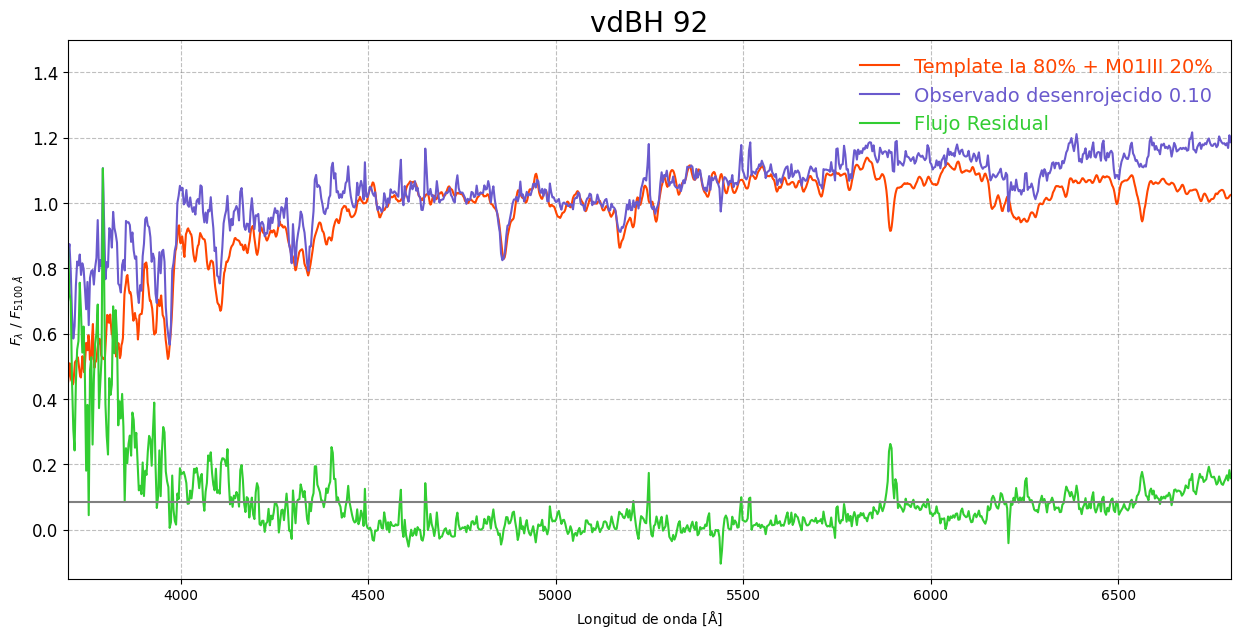

In [102]:
mean_residual = np.mean(Residual['flux'])

# Configura el gráfico
plt.figure(figsize=(15,7))

plt.style.use('default')

#plt.subplot(facecolor='#1e1f24ff')

plt.grid(color='gray', linestyle='--', linewidth=0.8, alpha= 0.5)

# Obtener el objeto de los ejes actuales
#ax = plt.gca()

# Cambiar el color de los ejes
#ax.spines['top'].set_color('#f1c232')
#ax.spines['bottom'].set_color('#f1c232')
#ax.spines['left'].set_color('#f1c232')
#ax.spines['right'].set_color('#f1c232')

# Cambiar el color de las etiquetas de los ejes (ticks)
#ax.tick_params(axis='x', colors='#f1c232', labelsize=14, rotation=15)  # Color de las etiquetas en el eje X
#ax.tick_params(axis='y', colors='#f1c232', labelsize=14)  # Color de las etiquetas en el eje Y


# Cambiar el color de las etiquetas de los ejes (nombres de los ejes X e Y)
#ax.set_xlabel('', color='#f1c232', fontsize=14)
#ax.set_ylabel('', color='#f1c232', fontsize=14)

# Graficar los archivos
plt.plot(Template['wl'],Template['flux'], label=f'Template {nombre_temp}', color='orangered')
plt.plot(Unreddened['wl'],Unreddened['flux'], label=f'Observado desenrojecido {enroj:.2f}', color='slateblue')
plt.plot(Residual['wl'], Residual['flux'], label='Flujo Residual', color='limegreen')

# Graficar la línea horizontal que indica el valor medio del flujo residual
plt.axhline(y=mean_residual, color='grey', linestyle='-')

# Configuración de los ejes
plt.xlabel('Longitud de onda [$\\mathrm{\\AA}$]')
plt.ylabel(r'$F_{\lambda} \ / \ F_{5100 \ Å} $')

# Limitar el eje X entre 3500 y 5800
plt.xlim(3700, 6800)

plt.ylim(-0.15, 1.5)

# Ajustar los ticks del eje X para asegurar que 5800 esté visible
#plt.xticks(np.arange(3500, 5701, 300))
plt.yticks(fontsize=12)
# Desactiva la notación científica en el eje Y
#plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#plt.gca().yaxis.get_offset_text().set_visible(False)  # Oculta el texto de notación científica

# Crear la leyenda
legend = plt.legend(loc='upper right', frameon=False, markerscale=0.7, fontsize=14)

# Cambiar los colores de las etiquetas individualmente
legend.get_texts()[0].set_color("orangered")   # Primer etiqueta
legend.get_texts()[1].set_color("slateblue")    # Segunda etiqueta
legend.get_texts()[2].set_color("limegreen")  # Tercera etiqueta


# Título y leyenda
#plt.legend(loc='upper right', frameon=False, markerscale=0.7, facecolor='#1e1f24ff', labelcolor='#f1c232', edgecolor='#f1c232', fontsize=14)
#plt.legend(frameon=False, markerscale=0.7, facecolor='#1e1f24ff', labelcolor='#f1c232', edgecolor='#f1c232', fontsize=14)
plt.title(nombre_cum, fontsize=20)

#CAMBIAR NOMBRE!
plt.savefig('vdBH92_IaM01III_1.png', dpi=300, bbox_inches='tight')

plt.show()


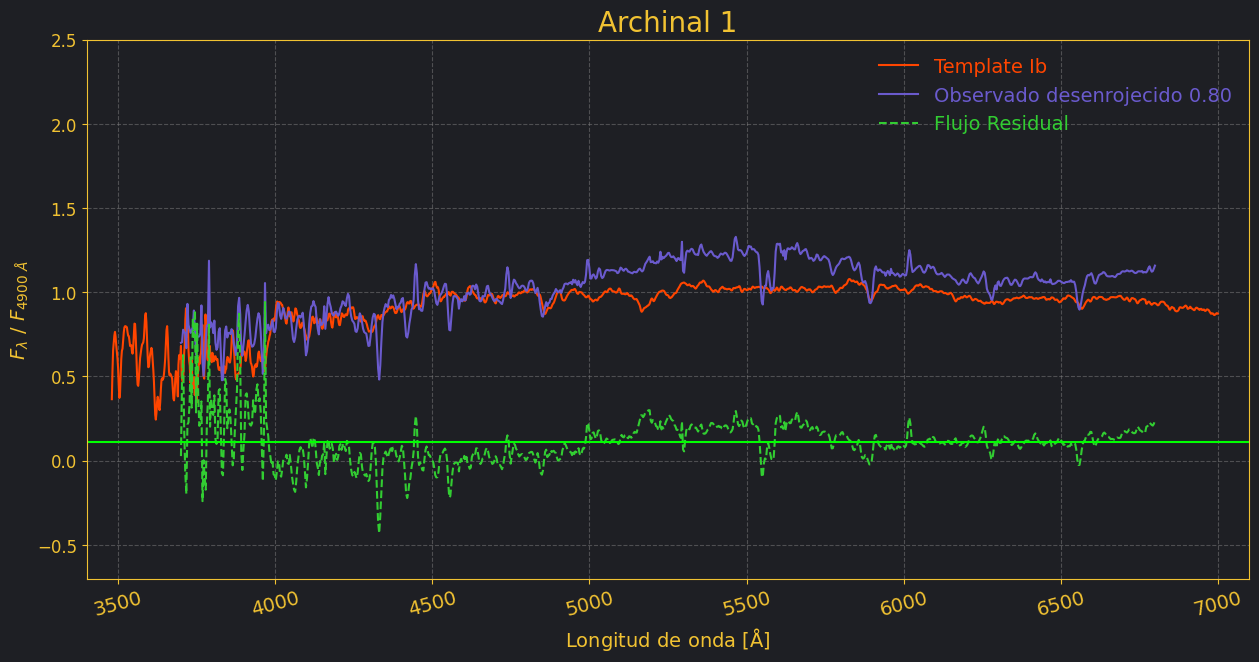

In [33]:
mean_residual = np.mean(Residual['flux'])

# Configura el gráfico
plt.figure(figsize=(15,7), facecolor='#1e1f24ff')

plt.style.use('dark_background')

plt.subplot(facecolor='#1e1f24ff')

plt.grid(color='gray', linestyle='--', linewidth=0.8, alpha= 0.5)

# Obtener el objeto de los ejes actuales
ax = plt.gca()

# Cambiar el color de los ejes
ax.spines['top'].set_color('#f1c232')
ax.spines['bottom'].set_color('#f1c232')
ax.spines['left'].set_color('#f1c232')
ax.spines['right'].set_color('#f1c232')

# Cambiar el color de las etiquetas de los ejes (ticks)
ax.tick_params(axis='x', colors='#f1c232', labelsize=14, rotation=15)  # Color de las etiquetas en el eje X
ax.tick_params(axis='y', colors='#f1c232', labelsize=14)  # Color de las etiquetas en el eje Y


# Cambiar el color de las etiquetas de los ejes (nombres de los ejes X e Y)
ax.set_xlabel('', color='#f1c232', fontsize=14)
ax.set_ylabel('', color='#f1c232', fontsize=14)

# Graficar los archivos
plt.plot(Template['wl'],Template['flux'], label=f'Template {nombre_temp}', color='orangered')
plt.plot(Unreddened['wl'],Unreddened['flux'], label=f'Observado desenrojecido {enroj:.2f}', color='slateblue')
plt.plot(Residual['wl'], Residual['flux'], label='Flujo Residual', color='limegreen', linestyle='--')

# Graficar la línea horizontal que indica el valor medio del flujo residual
plt.axhline(y=mean_residual, color='lime', linestyle='-')

# Configuración de los ejes
plt.xlabel('Longitud de onda [$\\mathrm{\\AA}$]')
plt.ylabel(r'$F_{\lambda} \ / \ F_{4900 \ Å} $')

# Limitar el eje X entre 3500 y 5800
plt.xlim(3400, 7100)

plt.ylim(-0.7, 2.5)

# Ajustar los ticks del eje X para asegurar que 5800 esté visible
#plt.xticks(np.arange(3500, 5701, 300))
plt.yticks(fontsize=12)
# Desactiva la notación científica en el eje Y
#plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#plt.gca().yaxis.get_offset_text().set_visible(False)  # Oculta el texto de notación científica

# Crear la leyenda
legend = plt.legend(loc='upper right', frameon=False, markerscale=0.7, facecolor='#1e1f24ff', edgecolor='#f1c232', fontsize=14)

# Cambiar los colores de las etiquetas individualmente
legend.get_texts()[0].set_color("orangered")   # Primer etiqueta
legend.get_texts()[1].set_color("slateblue")    # Segunda etiqueta
legend.get_texts()[2].set_color("limegreen")  # Tercera etiqueta


# Título y leyenda
#plt.legend(loc='upper right', frameon=False, markerscale=0.7, facecolor='#1e1f24ff', labelcolor='#f1c232', edgecolor='#f1c232', fontsize=14)
#plt.legend(frameon=False, markerscale=0.7, facecolor='#1e1f24ff', labelcolor='#f1c232', edgecolor='#f1c232', fontsize=14)
plt.title(nombre_cum, color='#f1c232', fontsize=20)

#CAMBIAR NOMBRE!
#plt.savefig('ESO312-04_Yg_40', dpi=300, bbox_inches='tight', facecolor='#1e1f24ff')

plt.show()
